In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv(next(iter(uploaded)))
print(df.head())

Saving advertising.csv to advertising (1).csv
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


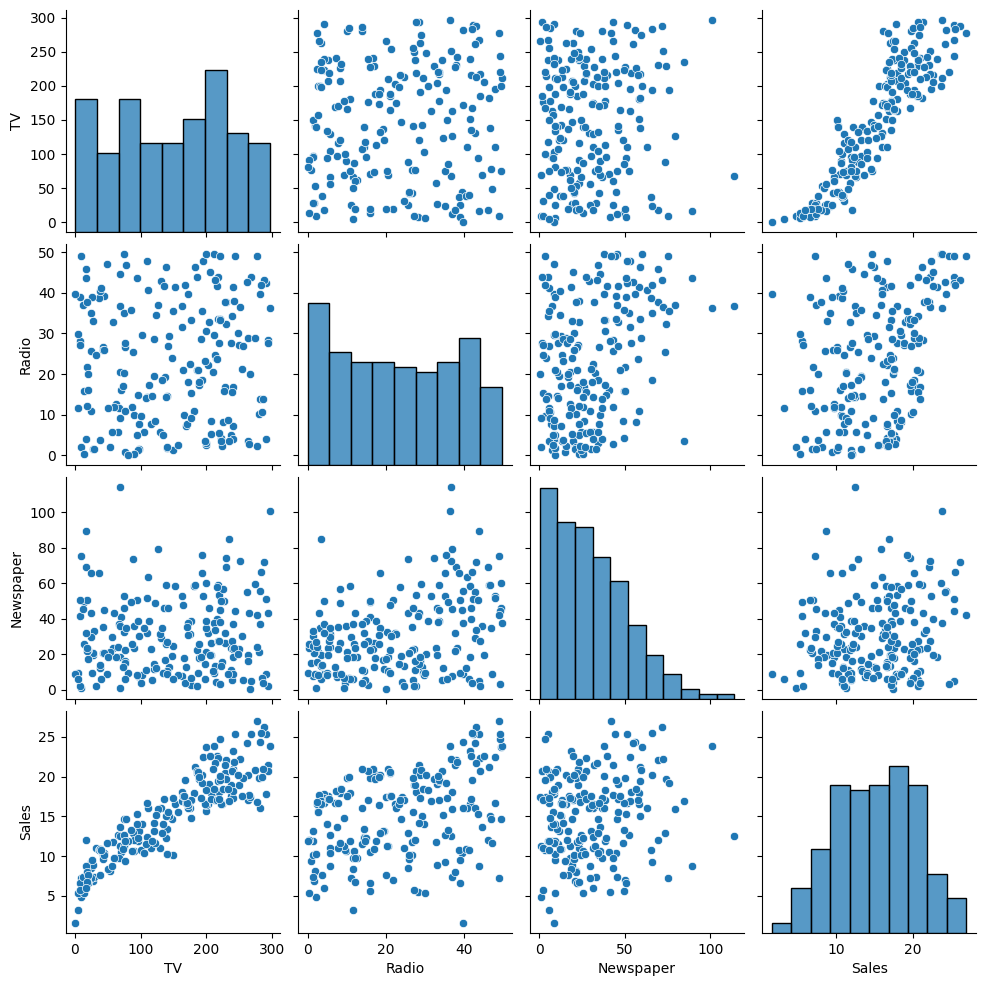

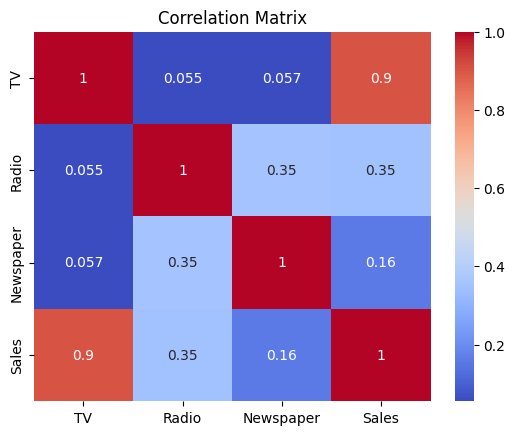

In [15]:
print(df.info())
print(df.describe())
print(df.isnull().sum())
sns.pairplot(df)
plt.show()
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [16]:
c = df[['TV', 'Radio', 'Newspaper']]
d = df['Sales']

In [17]:
c_train, c_test, d_train, d_test = train_test_split(c, d, test_size=0.2, random_state=42)

In [18]:
model = LinearRegression()
model.fit(c_train, d_train)


LinearRegression()

Mean Squared Error: 2.9077569102710896
R² Score: 0.9059011844150826


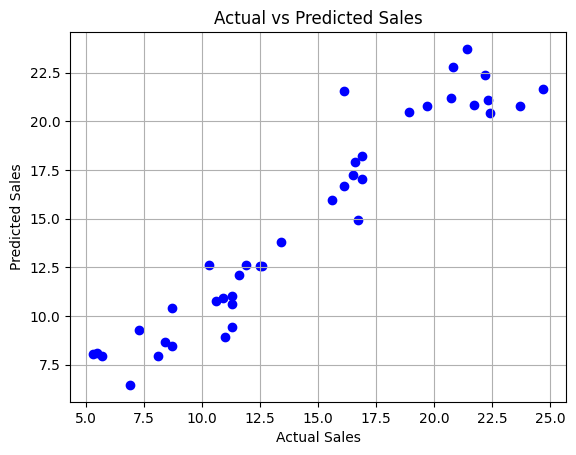

In [19]:
d_pred = model.predict(c_test)
print("Mean Squared Error:", mean_squared_error(d_test, d_pred))
print("R² Score:", r2_score(d_test, d_pred))
plt.scatter(d_test, d_pred, color='blue')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.grid(True)
plt.show()


In [20]:
print("Intercept:", model.intercept_)
print("Coefficients:")
for feature, coef in zip(c.columns, model.coef_):
    print(f"{feature}: {coef}")

Intercept: 4.714126402214127
Coefficients:
TV: 0.05450927083721978
Radio: 0.10094536239295579
Newspaper: 0.0043366468220340446


In [21]:
import joblib
joblib.dump(model, 'advertising_sales_model.pkl')

['advertising_sales_model.pkl']